# Housing Prices

In recent years with the rise in the field of machine learning, some companies like Airbnb are emerging which provide house renting and buying facilities to their users. But they don't just take prices directly from the renters rather they use ML to set appropriate prices for every house. In this challenge we'll be trying to find best ML approach for finding House Prices in Melbourne.

We will try different regression algorithms to check which works best with this dataset. After creating the model we would try cross validation scores for each of them for further scoring. There are mainly 4 regression models that we covered in supervised learning units.

    1. Linear Regression
    2. Random Forest Regressor
    3. SVR
    4. Gradient Boosting Regressor
    
There are multiple parts of Linear Regression and we would try building every model from it, again to check which works best.

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVR

%matplotlib inline

We are using dataset from kaggle(https://www.kaggle.com/anthonypino/melbourne-housing-market).

In [25]:
df = pd.read_csv('/home/vivek/Downloads/melbourne/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [26]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [27]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

In [45]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode           int64
Regionname        object
Propertycount      int64
Distance         float64
CouncilArea       object
dtype: object

### EDA

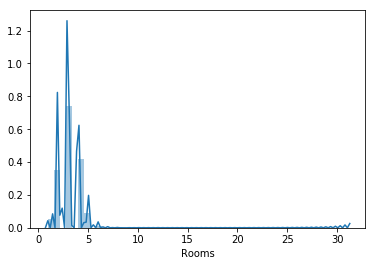

In [28]:
sns.distplot(df['Rooms'])

Most entries have 3 rooms in it. Now, rooms are a major part of house pricing as anyone who buys or rents has some personal requirements.

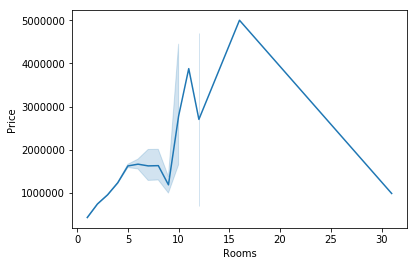

In [29]:
sns.lineplot(df['Rooms'], df['Price'])

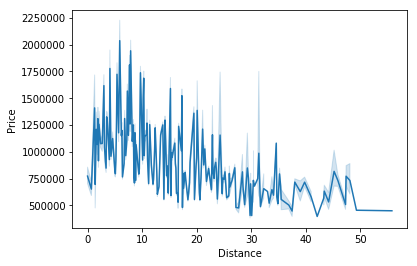

In [30]:
sns.lineplot(df['Distance'], df['Price'])

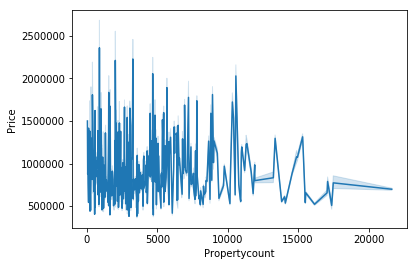

In [31]:
sns.lineplot(df['Propertycount'], df['Price'])

In [32]:
df['Regionname'].value_counts()

Southern Metropolitan         17559
Northern Metropolitan         16781
Western Metropolitan          11717
Eastern Metropolitan          10396
South-Eastern Metropolitan     5212
Eastern Victoria                564
Northern Victoria               556
Western Victoria                238
Name: Regionname, dtype: int64

### Data Cleaning

In [46]:
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
df['date_delta'] = (df['Date'] - df['Date'].min())  / np.timedelta64(1,'D')

In [57]:
new_df = df.drop(['Suburb', 'Address', 'Method', 'SellerG','Date', 'CouncilArea'], 1)

In [58]:
new_df.head()

,Rooms,Type,Price,Postcode,Regionname,Propertycount,Distance,date_delta
0,3,h,1490000.0,3067,Northern Metropolitan,4019,3.0,342.0
1,3,h,1220000.0,3067,Northern Metropolitan,4019,3.0,342.0
2,3,h,1420000.0,3067,Northern Metropolitan,4019,3.0,342.0
3,3,h,1515000.0,3040,Western Metropolitan,1543,7.5,342.0
4,2,h,670000.0,3042,Western Metropolitan,3464,10.4,342.0


In [59]:
new_df = new_df.dropna()

Convert categorical data into binary features.

In [60]:
concat_df = pd.concat([new_df, pd.get_dummies(new_df['Regionname']), pd.get_dummies(new_df['Type'])], sort=False, axis=1)

In [61]:
concat_df['Rooms^2'] = concat_df['Rooms'] ** 2

In [62]:
concat_df.head()

,Rooms,Type,Price,Postcode,Regionname,Propertycount,Distance,date_delta,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,h,t,u,Rooms^2
0,3,h,1490000.0,3067,Northern Metropolitan,4019,3.0,342.0,0,0,1,0,0,0,0,0,1,0,0,9
1,3,h,1220000.0,3067,Northern Metropolitan,4019,3.0,342.0,0,0,1,0,0,0,0,0,1,0,0,9
2,3,h,1420000.0,3067,Northern Metropolitan,4019,3.0,342.0,0,0,1,0,0,0,0,0,1,0,0,9
3,3,h,1515000.0,3040,Western Metropolitan,1543,7.5,342.0,0,0,0,0,0,0,1,0,1,0,0,9
4,2,h,670000.0,3042,Western Metropolitan,3464,10.4,342.0,0,0,0,0,0,0,1,0,1,0,0,4


In [63]:
final_df=concat_df.drop(['Type', 'Regionname'],1)

In [64]:
X = final_df.drop('Price', 1)
Y = final_df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

## Creating Models

### Linear Regression

In [65]:
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
print("R-squared score on train data: ", reg.score(X_train, Y_train))
print("R-squared score on test data: ", reg.score(X_test,Y_test))
print("Cross validation: ", cross_val_score(reg, X_train, Y_train, cv=5))

R-squared score on train data:  0.5292342378645201
R-squared score on test data:  0.5346209378376408
Cross validation:  [0.54066989 0.5398177  0.54471986 0.52718156 0.49154656]


In [66]:
preg = PLSRegression(n_components=7)
preg.fit(X_train, Y_train)
print("R-squared score on train data: ", preg.score(X_train, Y_train))
print("R-squared score on test data: ", preg.score(X_test,Y_test))
print("Cross validation: ", cross_val_score(preg, X_train, Y_train, cv=5))

R-squared score on train data:  0.528817316943679
R-squared score on test data:  0.5344412297724148
Cross validation:  [0.54030449 0.45500339 0.54450342 0.52706397 0.49125041]


In [67]:
reg = linear_model.Ridge(alpha=10)
reg.fit(X_train, Y_train)
print("R-squared score on train data: ", reg.score(X_train, Y_train))
print("R-squared score on test data: ", reg.score(X_test,Y_test))
print("Cross validation: ", cross_val_score(reg, X_train, Y_train, cv=5))

R-squared score on train data:  0.5292314505806452
R-squared score on test data:  0.5346361399043071
Cross validation:  [0.54067223 0.53946837 0.54476087 0.52718083 0.49150172]


In [68]:
reg = linear_model.Lasso(alpha=100)
reg.fit(X_train, Y_train)
print("R-squared score on train data: ", reg.score(X_train, Y_train))
print("R-squared score on test data: ", reg.score(X_test,Y_test))
print("Cross validation: ", cross_val_score(reg, X_train, Y_train, cv=5))

R-squared score on train data:  0.5292173064190568
R-squared score on test data:  0.5346452258104458
Cross validation:  [0.54066506 0.53944812 0.54476601 0.52718391 0.49142968]


All the Linear Regression models are arguably having the same accuracy and it would not make any major difference if we use any of them. Now, let's check if other models perform better.

### Random Forest Regressor

In [69]:
rfr = RandomForestRegressor()
param_grid = {
    'n_estimators': [20, 30, 40, 50, 60],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)

In [70]:
CV_rfr.fit(X_train, Y_train)
print("R-squared score on train data: ", CV_rfr.score(X_train, Y_train))
print("R-squared score on test data: ", CV_rfr.score(X_test,Y_test))
print("Best parameters: ", CV_rfr.best_params_)
print("Cross validation: ", cross_val_score(CV_rfr, X_train, Y_train, cv=5))

R-squared score on train data:  0.9211678834686811
R-squared score on test data:  0.6667792976644822
Best parameters:  {'max_features': 'auto', 'n_estimators': 50}
Cross validation:  [0.67511105 0.68626881 0.67450089 0.67977064 0.65070913]


### SVR

In [23]:
svr = SVR()
svr.fit(X_train, Y_train)
print("R-squared score on train data: ", svr.score(X_train, Y_train))
print("R-squared score on test data: ", svr.score(X_test,Y_test))
print("Cross validation: ", cross_val_score(svr, X_train, Y_train, cv=5))

R-squared score on train data:  -0.07896653171668122
R-squared score on test data:  -0.08232947487320796
Cross validation:  [-0.07640685 -0.08377503 -0.07995471 -0.0646596  -0.08726765]


### Gradient Boosting Regressor

In [26]:
gbr = GradientBoostingRegressor()
param_grid = {
    'loss' : ['ls', 'lad', 'huber', 'quantile'],
    'n_estimators' : [100, 150, 200, 250, 300]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5)

In [ ]:
CV_gbr.fit(X_train, Y_train)
print("R-squared score on train data: ", CV_gbr.score(X_train, Y_train))
print("R-squared score on test data: ", CV_gbr.score(X_test,Y_test))
print("Best parameters: ", CV_gbr.best_params_)
print("Cross validation: ", cross_val_score(CV_gbr, X_train, Y_train, cv=5))